In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df_train = pd.read_csv(r"D:\HK4\DS102-machine-learning\src_code\data\train.csv")
df_val = pd.read_csv(r"D:\HK4\DS102-machine-learning\src_code\data\val.csv")
df = pd.concat([df_train, df_val], axis=0)

In [ ]:
df.to_csv(r"D:\HK4\DS102-machine-learning\src_code\data\data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.3+ KB


# Unique Values

In [5]:
#races
races=df["race/ethnicity"].unique()
print("Races:", races)
for race in races:
    print("There Are {} Races Belong to {}" \

          .format(df["race/ethnicity"][df["race/ethnicity"]==race].count(),race))

Races: ['group D' 'group B' 'group C' 'group E' 'group A']
There Are 257 Races Belong to group D
There Are 198 Races Belong to group B
There Are 323 Races Belong to group C
There Are 143 Races Belong to group E
There Are 79 Races Belong to group A


In [6]:
#parental level of education
level_education=df["parental level of education"]
level_education_columns=level_education.unique()
print("There are {} unique values".format(len(level_education_columns)))
print("{}".format([_ for _ in level_education_columns]))

There are 6 unique values
['some college', "associate's degree", 'some high school', "bachelor's degree", "master's degree", 'high school']


# Plot

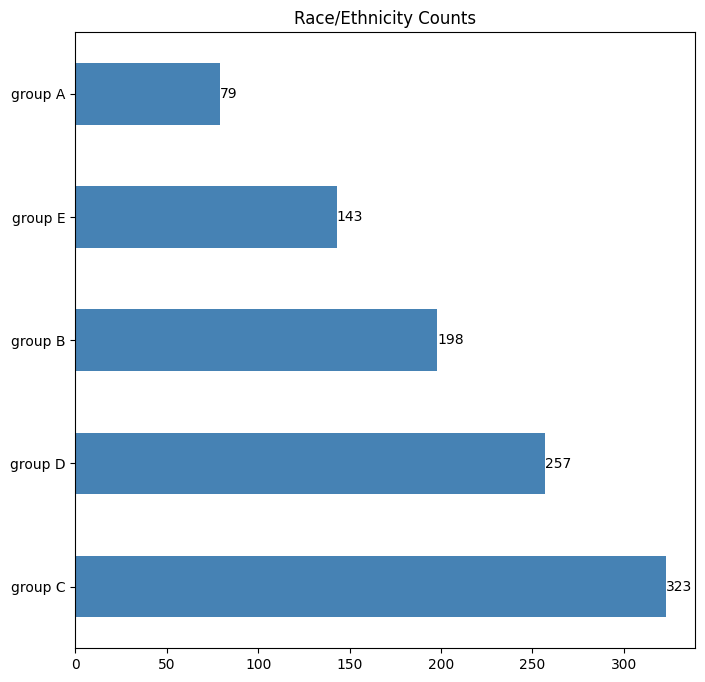

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
race_ethnicity_counts = df['race/ethnicity'].value_counts()
race_ethnicity_counts.plot(kind='barh', title='Race/Ethnicity Counts', color = "steelblue")
for i, count in enumerate(race_ethnicity_counts):
    axes.text(count, i, str(count), ha='left', va='center')

plt.show()

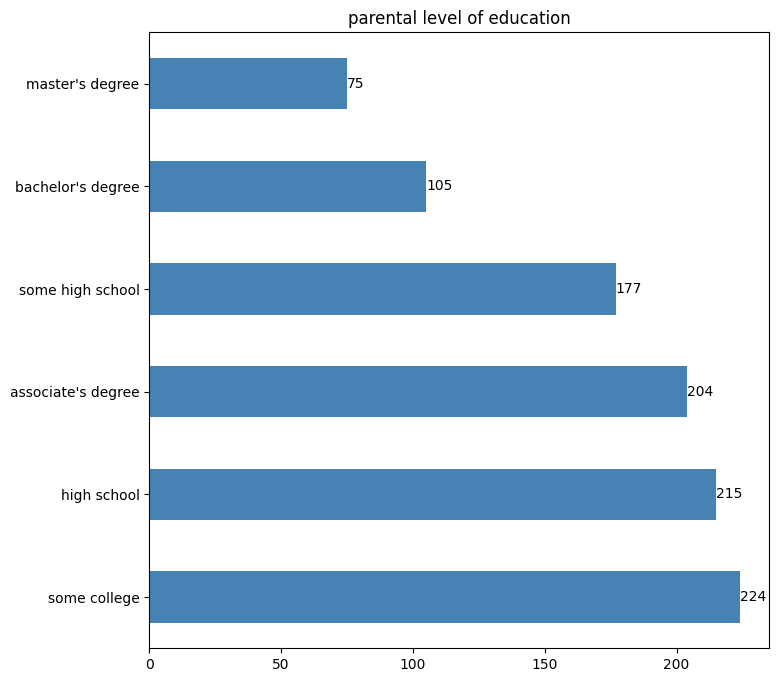

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
race_ethnicity_counts = df['parental level of education'].value_counts()
race_ethnicity_counts.plot(kind='barh', title='parental level of education',color = 'steelblue')
for i, count in enumerate(race_ethnicity_counts):
    axes.text(count, i, str(count), ha='left', va='center')

plt.show()

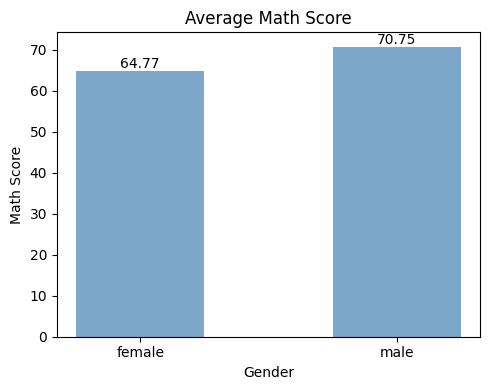

In [9]:
math_score_by_test_gender = df.groupby('gender')['math score'].mean().sort_values(ascending=True)

fig, axes = plt.subplots(1, 1, figsize=(5, 4))

axes.bar(math_score_by_test_gender.index, math_score_by_test_gender.values, color='steelblue', alpha=0.7, width=0.5)
axes.set_title('Average Math Score')
axes.set_xlabel('Gender')
axes.set_ylabel('Math Score')

for i, v in enumerate(math_score_by_test_gender.values):
    axes.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

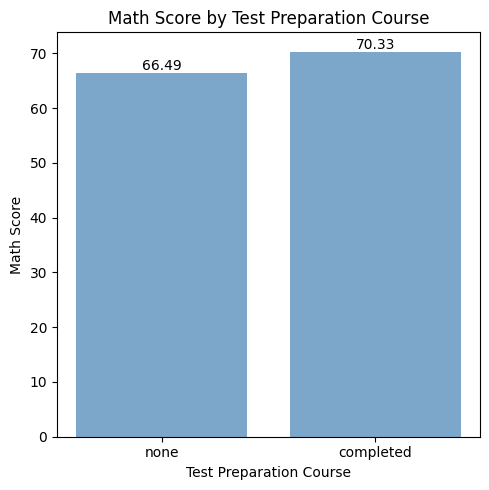

In [10]:
math_score_by_test_pre = df.groupby('test preparation course')['math score'].mean().sort_values(ascending=True)

fig, axes = plt.subplots(1, 1, figsize=(5,5))

axes.bar(math_score_by_test_pre.index, math_score_by_test_pre.values, color='steelblue', alpha=0.7)
axes.set_title('Math Score by Test Preparation Course')
axes.set_xlabel('Test Preparation Course')
axes.set_ylabel('Math Score')

for i, v in enumerate(math_score_by_test_pre.values):
    axes.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

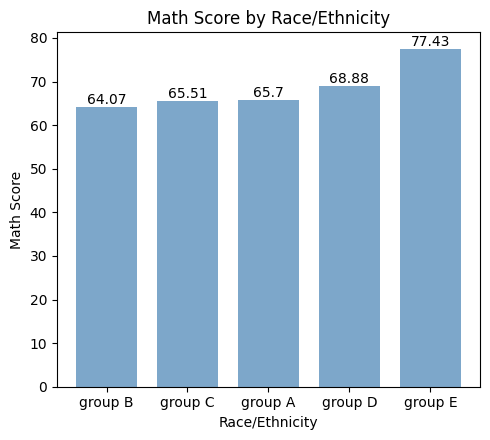

In [11]:
math_score_by_raceEthnicity = df.groupby('race/ethnicity')['math score'].mean().sort_values(ascending=True)

fig, axes = plt.subplots(1, 1, figsize=(5,4.5))

axes.bar(math_score_by_raceEthnicity.index, math_score_by_raceEthnicity.values, color='steelblue', alpha=0.7, width=0.75)
axes.set_title('Math Score by Race/Ethnicity')
axes.set_xlabel('Race/Ethnicity')
axes.set_ylabel('Math Score')

for i, v in enumerate(math_score_by_raceEthnicity.values):
    axes.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

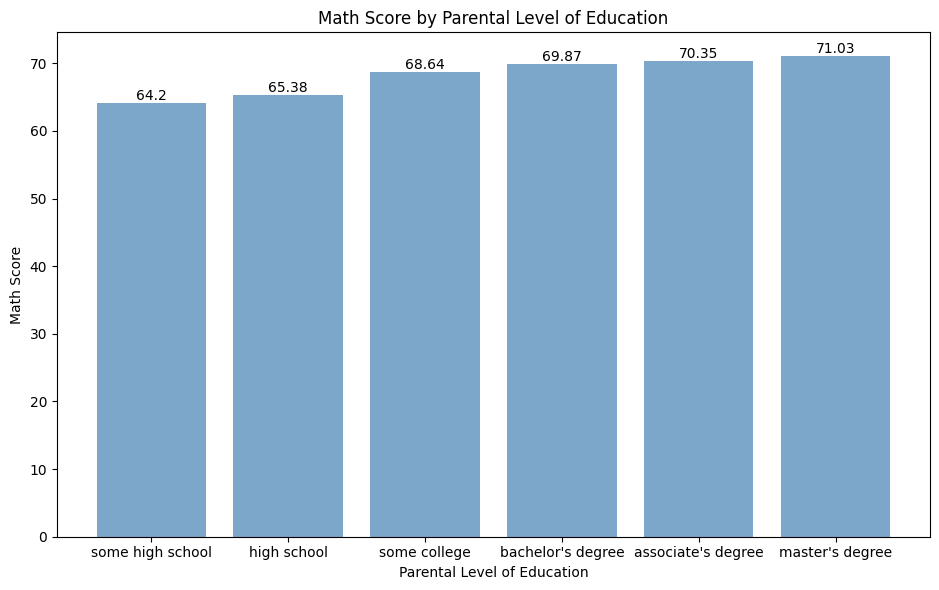

In [12]:
math_score_by_parental = df.groupby('parental level of education')['math score'].mean().sort_values(ascending=True)

fig, axes = plt.subplots(1, 1, figsize=(9.5,6))

axes.bar(math_score_by_parental.index, math_score_by_parental.values, color='steelblue', alpha=0.7)
axes.set_title('Math Score by Parental Level of Education')
axes.set_xlabel('Parental Level of Education')
axes.set_ylabel('Math Score')

for i, v in enumerate(math_score_by_parental.values):
    axes.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()

plt.show()

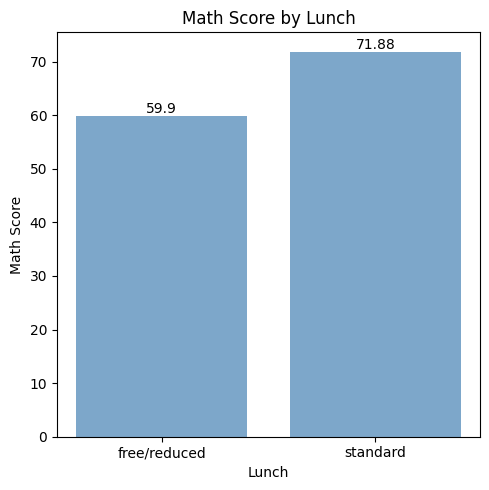

In [13]:
math_score_by_lunch = df.groupby('lunch')['math score'].mean().sort_values(ascending=True)

fig, axes = plt.subplots(1, 1, figsize=(5,5))

axes.bar(math_score_by_lunch.index, math_score_by_lunch.values, color='steelblue', alpha=0.7)
axes.set_title('Math Score by Lunch')
axes.set_xlabel('Lunch')
axes.set_ylabel('Math Score')

for i, v in enumerate(math_score_by_lunch.values):
    axes.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()